In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('gender.csv', encoding = 'euc_kr')
# df

list_data = []
for i in df['행정구역']:
    list_data.append(i.split(' (')[0].strip(' '))

df['행정구역'] = list_data
df

,행정구역,2024년06월_계_총인구수,2024년06월_계_연령구간인구수,2024년06월_계_0세,2024년06월_계_1세,2024년06월_계_2세,2024년06월_계_3세,2024년06월_계_4세,2024년06월_계_5세,2024년06월_계_6세,...,2024년06월_여_91세,2024년06월_여_92세,2024년06월_여_93세,2024년06월_여_94세,2024년06월_여_95세,2024년06월_여_96세,2024년06월_여_97세,2024년06월_여_98세,2024년06월_여_99세,2024년06월_여_100세 이상
0,서울특별시,"9,366,283","9,366,283","37,461","39,642","41,067","43,089","45,114","48,661","52,273",...,"6,598","5,399","3,926","3,330","2,612","1,882","1,322",751,539,"1,152"
1,서울특별시 종로구,"139,189","139,189",385,423,480,460,543,523,605,...,128,105,78,65,52,48,33,17,13,30
2,서울특별시 중구,"121,475","121,475",493,501,537,560,525,498,517,...,128,90,76,63,46,47,27,9,7,17
3,서울특별시 용산구,"206,061","206,061",924,967,935,964,"1,019","1,077","1,073",...,179,175,104,79,86,56,39,19,14,40
4,서울특별시 성동구,"276,597","276,597","1,496","1,428","1,598","1,558","1,618","1,647","1,674",...,187,156,118,99,64,52,32,13,11,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,경상남도 거창군,"59,867","59,867",204,196,197,217,258,292,310,...,158,113,97,62,58,36,21,21,15,22
290,경상남도 합천군,"40,756","40,756",69,88,86,106,120,107,98,...,159,120,88,68,39,30,25,16,8,23
291,제주특별자치도,"672,252","672,252","3,108","3,472","3,696","4,154","4,549","5,035","5,583",...,885,700,464,434,265,211,124,93,60,244
292,제주특별자치도 제주시,"489,621","489,621","2,424","2,672","2,817","3,166","3,386","3,809","4,177",...,589,450,314,293,191,146,82,67,47,172


In [29]:
def find_index(column_name):
    for i in range(len(df.columns)):
        if df.columns[i] == column_name:
            print(f'idx: {i}')

print('남자 인덱스 위치')
find_index('2024년06월_남_0세')
find_index('2024년06월_남_100세 이상')

print('여자 인덱스 위치')
find_index('2024년06월_여_0세')
find_index('2024년06월_여_100세 이상')

남자 인덱스 위치
idx: 106
idx: 206
여자 인덱스 위치
idx: 209
idx: 309


In [30]:
def gender_population(city, gender):
    if gender == 'man':
        gender_df = df[df['행정구역'] == city].iloc[:, 106:207]
    elif gender == 'woman':
        gender_df = df[df['행정구역'] == city].iloc[:, 209:310]

    pop_list = []
    for i in list(gender_df.iloc[0]):
        if type(i) == str:
            pop_list.append(int(i.replace(',', '')))
        else:
            pop_list.append(i)

    return sum(pop_list)

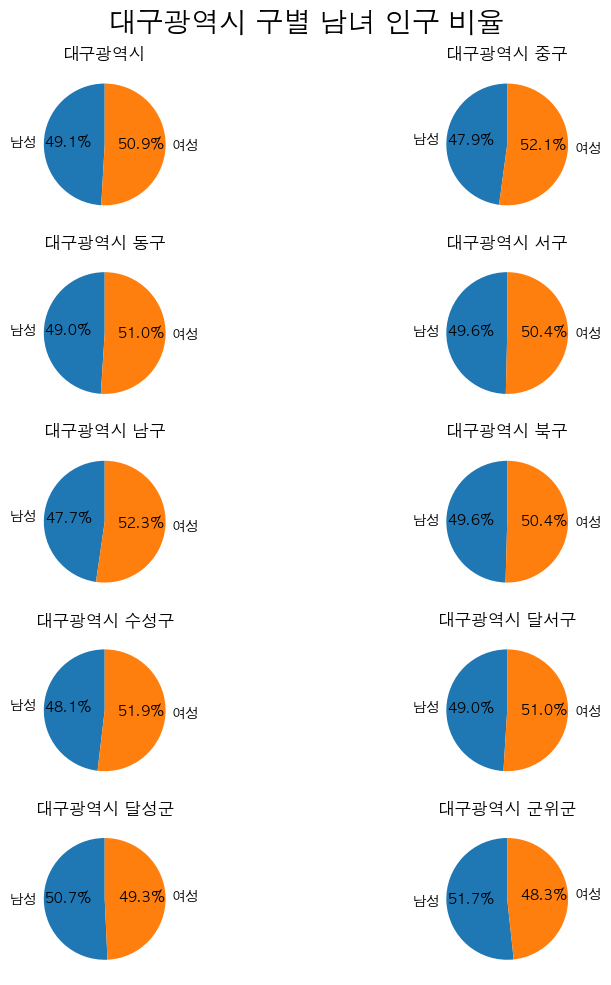

In [55]:
fig, axes = plt.subplots(5, 2, figsize = (10, 10))

city_list = ['대구광역시', '대구광역시 중구', '대구광역시 동구', '대구광역시 서구', '대구광역시 남구',
             '대구광역시 북구', '대구광역시 수성구', '대구광역시 달서구', '대구광역시 달성군', '대구광역시 군위군']

plt.rcParams['font.family'] = 'AppleGothic'
for i in range(5):
    for j in range(2):
        axes[i, j].pie([gender_population(city_list[i*2 + j], 'man'),
                        gender_population(city_list[i*2 + j], 'woman')],
                        labels = ['남성', '여성'],
                        startangle=90, autopct='%.1f%%')
        axes[i, j].set_title(city_list[i*2 + j])

plt.suptitle('대구광역시 구별 남녀 인구 비율', fontsize = 20)
plt.tight_layout()
plt.show()